# Logistic Regression 

This is a model for classification not regression. Below are some of it fundamental properties.<br>
1) One of the most widely used classification algorithm in industry.<br>
2) Easy to implement.<br>
3) Linear model for binary classification but can be extended to multiclass via OvR technique.<br>
4) Performs very well on linearly sperable data.

## Probabilistic model 

**Odds RatiO**: The odds in favour of a particular event. The odds ratio can be written as <br>
             $$ p/(1-p) $$
where ***p*** stands for the probability of the positive event(event that we wan to predict). For example the probability that a patient has a certain disease.<br>
**Logit Function:** This is simply logarithm of the odds ratio.<br> 
$$ logit(p) = log p/(1-p) $$
- log stands for natural log. <br>
- takes input values in the range 0 to 1. <br>
- transforms input values over the entire real numbers range.


## Sigmoid Function:

This is the invers form of the logit function and is called **logistic sigmoid function** also called as **Sigmoid Function.**
$$  𝜙𝑧=1/1+e^{-z} $$
- The sigmoid function takes **real number** values as inputs and transform them into values in the range **[0,1]**. 
- In logistics regression **Sigmoid Function** is used as activation function.

## Logistic Regression With Scikit Learn


- Use Iris data set in scikit-learn
- Use features «petal length» and «petal width»
- Split the data into training and test set (test_size=0.3, random_state=1)
- Intialise LogisticRegression class with
    -  LogisticRegression(C=100.0, random_state=1) 
- Plot decision regions
- Print out classification accuracy for test data

In [2]:
#Required Imports
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [3]:
## Loading the dataset
iris = datasets.load_iris()
#Splitting the data into X and y. Using petal length and petal width feature.
X = iris.data[:,[2,3]]
y = iris.target


In [4]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
#Initialise standard scaler and compute mean and STD from training data.
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
# Train logistic regression model from scikit-learn
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
#Predict 
y_predict = lr.predict(X_test_std)

In [8]:
#Print out accuracy
print('Accuracy: {0:.2f}'.format(lr.score(X_test_std, y_test)))

Accuracy: 0.98


In [11]:
# Print accuracy computed from predictions on the test set
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_predict)))

Accuracy: 0.98


In [13]:
#Print Misclassified Samples
print("Misclassified samples: " , (y_test != y_predict).sum())

Misclassified samples:  1


## Plot Decision Regions using MLXTEND

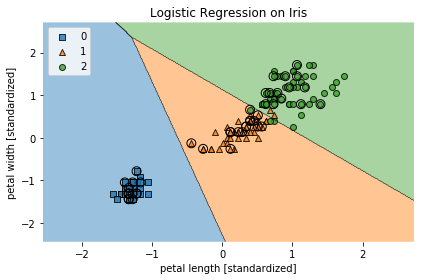

In [15]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,clf=lr,X_highlight=X_test_std)
plt.title('Logistic Regression on Iris')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

## IRIS Data Set With All Features

- Use Iris data set in scikit-learn
- Use ALL features
- Split the data into training and test set 
    -  (test_size=0.3, random_state=1) 
- Intialise LogisticRegression class with
     -  LogisticRegression(C=100.0, random_state=1)
- Print out number of misclassified samples
- Print out classification accuracy for training data & test data

In [18]:
# All the features
X_all= iris.data
y_all = iris.target

In [20]:
#Split into training and test data
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.3, random_state=3, stratify=y_all)

In [21]:
# Scale features using StandardScaler class in scikit-learn
sc.fit(X_all_train)
# Transform (standardise) both X_train and X_test with mean and STD from# training data
X_train_all_std = sc.transform(X_all_train)
X_test_all_std = sc.transform(X_all_test)

In [22]:
# Train multiclass perceptron that is implemented in scikit-learn
logR = LogisticRegression(C=100, random_state=1)
logR.fit(X_train_all_std, y_all_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Predict classes for samples in test set and print number of misclassfications
y_all_pred = logR.predict(X_test_all_std)
print('Misclassified samples: {0}'.format((y_all_test != y_all_pred).sum()))

Misclassified samples: 4


In [24]:
# Compute performance metrics in a couple of ways
# Print accuracy computed from predictions on the test set
print('Accuracy: {0:.2f}'.format(accuracy_score(y_all_test, y_all_pred)))

Accuracy: 0.91


In [25]:
# Print accuracy computed from predictions on the training set
print('Training data accuracy: {0:.2f}'.format(logR.score(X_train_all_std, y_all_train)))

Training data accuracy: 0.98


In [26]:
# Print accuracy computed from predictions on the test set
print('Test data accuracy: {0:.2f}'.format(logR.score(X_test_all_std, y_all_test)))

Test data accuracy: 0.91
